In [1]:
# Original
#     https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py

In [2]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, Dropout, concatenate
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Using TensorFlow backend.


In [3]:
batch_size = 128
num_classes = 10
# epochs = 20
epochs = 5

In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [5]:
x1_train = np.copy(x_train)
x2_train = np.copy(x_train)
x1_test = np.copy(x_test)
x2_test = np.copy(x_test)

In [6]:
# make 2 images from 1 image
x1_train[:, 392:] = 0.0
x2_train[:, :392] = 0.0

x1_test[:, 392:] = 0.0
x2_test[:, :392] = 0.0

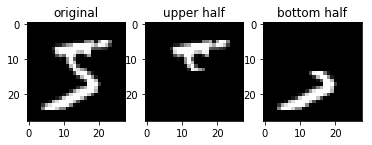

In [7]:
plt.subplot(1, 3, 1)
plt.title('original')
plt.imshow(x_train[0].reshape(28, 28), cmap=cm.gray)

plt.subplot(1, 3, 2)
plt.title('upper half')
plt.imshow(x1_train[0].reshape(28, 28), cmap=cm.gray)

plt.subplot(1, 3, 3)
plt.title('bottom half')
plt.imshow(x2_train[0].reshape(28, 28), cmap=cm.gray)

In [8]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
# Multi input model
inp_x1 = Input(shape=(784,))
inp_x2 = Input(shape=(784,))

x1 = Dense(512, activation='relu')(inp_x1)
x1 = Dropout(0.2)(x1)
x1 = Dense(512, activation='relu')(x1)
x1 = Dropout(0.2)(x1)

x2 = Dense(512, activation='relu')(inp_x2)
x2 = Dropout(0.2)(x2)
x2 = Dense(512, activation='relu')(x2)
x2 = Dropout(0.2)(x2)

merged = concatenate([x1, x2])
merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.2)(merged)
out = Dense(num_classes, activation='softmax')(merged)

model = Model([inp_x1, inp_x2], out)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 512)          401920      input_3[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 512)          401920      input_4[0][0]                    
__________________________________________________________________________________________________
dropout_6 

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [12]:
history = model.fit([x1_train, x2_train], y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=([x1_test, x2_test], y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 17s 278us/step - loss: 0.2407 - acc: 0.9255 - val_loss: 0.1273 - val_acc: 0.9577
Epoch 2/5
60000/60000 [==============================] - 17s 279us/step - loss: 0.0972 - acc: 0.9714 - val_loss: 0.0704 - val_acc: 0.9786
Epoch 3/5
60000/60000 [==============================] - 16s 271us/step - loss: 0.0714 - acc: 0.9787 - val_loss: 0.0675 - val_acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 16s 271us/step - loss: 0.0626 - acc: 0.9820 - val_loss: 0.0617 - val_acc: 0.9818
Epoch 5/5
60000/60000 [==============================] - 16s 270us/step - loss: 0.0543 - acc: 0.9849 - val_loss: 0.0532 - val_acc: 0.9860


In [ ]:
score = model.evaluate([x1_test, x2_test], y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])